In [1]:
#Data Load

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR

import progressbar
from sklearn.metrics import r2_score


raw_dataset = pd.read_csv('./data/5_PA_2.csv', header=0, index_col=False)
print("* Raw dataset size : ", len(raw_dataset))

dataset = raw_dataset[["weight", "failure", "set_nozzle_temperature", "set_front_temperature", "set_intermediate_temperature", "set_rear_temperature", "set_mold_velocity_1", "set_mold_velocity_2", "set_mold_velocity_3", "set_mold_velocity_4", "set_mold_velocity_5", "set_mold_pressure_1", "set_mold_pressure_2", "set_mold_pressure_3", "set_mold_pressure_4", "set_mold_pressure_5", "set_mold_position_1", "set_mold_position_2", "set_mold_position_3", "set_mold_position_4", "set_mold_position_5", "set_hold_velocity_1", "set_hold_velocity_2", "set_hold_velocity_3", "set_hold_pressure_1", "set_hold_pressure_2", "set_hold_pressure_3"]]

positive_set = dataset.where(dataset["failure"]==0).dropna()
print("Positive Data : ", len(positive_set))
positive_X = positive_set[["set_nozzle_temperature", "set_front_temperature", "set_intermediate_temperature", "set_rear_temperature", "set_mold_velocity_1", "set_mold_velocity_2", "set_mold_velocity_3", "set_mold_velocity_4", "set_mold_velocity_5", "set_mold_pressure_1", "set_mold_pressure_2", "set_mold_pressure_3", "set_mold_pressure_4", "set_mold_pressure_5", "set_mold_position_1", "set_mold_position_2", "set_mold_position_3", "set_mold_position_4", "set_mold_position_5", "set_hold_velocity_1", "set_hold_velocity_2", "set_hold_velocity_3", "set_hold_pressure_1", "set_hold_pressure_2", "set_hold_pressure_3"]]
print("Positive X : ", len(positive_X))
print(positive_set)

negative_set = dataset.where(dataset["failure"]==1).dropna()
print("Negative Data : ", len(negative_set))
negative_X = negative_set[["set_nozzle_temperature", "set_front_temperature", "set_intermediate_temperature", "set_rear_temperature", "set_mold_velocity_1", "set_mold_velocity_2", "set_mold_velocity_3", "set_mold_velocity_4", "set_mold_velocity_5", "set_mold_pressure_1", "set_mold_pressure_2", "set_mold_pressure_3", "set_mold_pressure_4", "set_mold_pressure_5", "set_mold_position_1", "set_mold_position_2", "set_mold_position_3", "set_mold_position_4", "set_mold_position_5", "set_hold_velocity_1", "set_hold_velocity_2", "set_hold_velocity_3", "set_hold_pressure_1", "set_hold_pressure_2", "set_hold_pressure_3"]]
print("Negative X : ", len(negative_X))

positive_y = positive_set[["weight"]]
print("Positive y : ", len(positive_y))
negative_y = negative_set[["weight"]]
print("Negative y : ", len(negative_y))



* Raw dataset size :  67
Positive Data :  52
Positive X :  52
    weight  failure  set_nozzle_temperature  set_front_temperature  \
1    183.0      0.0                   250.0                  230.0   
2    187.0      0.0                   250.0                  230.0   
3    186.0      0.0                   250.0                  230.0   
4    187.0      0.0                   250.0                  210.0   
5    187.0      0.0                   250.0                  210.0   
6    183.0      0.0                   250.0                  220.0   
7    185.0      0.0                   250.0                  220.0   
8    185.0      0.0                   250.0                  220.0   
9    184.0      0.0                   250.0                  240.0   
10   184.0      0.0                   250.0                  240.0   
11   183.0      0.0                   250.0                  230.0   
12   182.0      0.0                   250.0                  230.0   
13   171.0      0.0         

In [7]:
X_train, X_test, y_train, y_test = train_test_split(positive_X, np.ravel(positive_y), test_size=0.33, shuffle=True)
model = SVR(kernel="poly", C=100, gamma="auto", degree=3, epsilon=0.1, coef0=1).fit(X_train, y_train)

y_pred_trainset = model.predict(X_train)
y_pred_testset = model.predict(X_test)

print("Trainset Score(RMSE) with ", (r2_score(y_pred_trainset, y_train))) # RMSE
print("Trainset Score(RMSE) with ", (r2_score(y_pred_testset, y_test))) # RMSE

print("Number of Train Samples : ", len(X_train))
print("* R-squared Score with Trainset (@positive) :", model.score(X_train, y_train))
print("* R-squared Score with Testset (@positive) :", model.score(X_test, y_test))



Trainset Score(RMSE) with  0.9706722982681407
Trainset Score(RMSE) with  0.32830990068611876
Number of Train Samples :  34
* R-squared Score with Trainset (@positive) : 0.9701069917149876
* R-squared Score with Testset (@positive) : -6.271691541302354


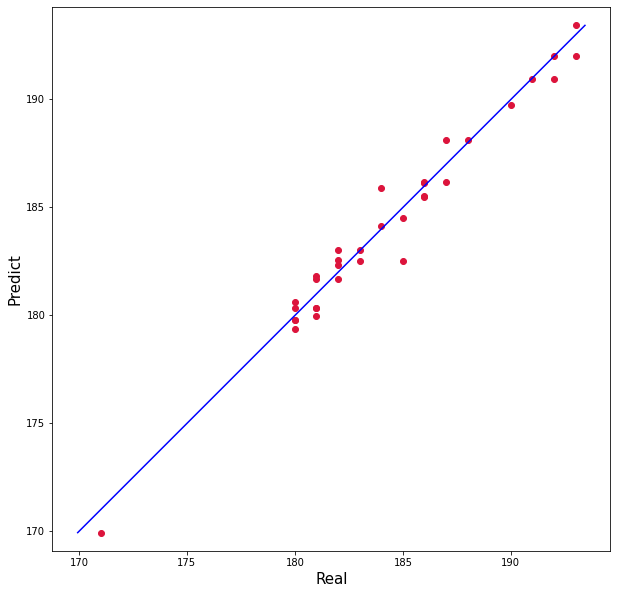

In [8]:
# visualization for trainset

plt.figure(figsize=(10,10))
plt.scatter(y_train, y_pred_trainset, c='crimson')
plt.yscale('linear')
plt.xscale('linear')

p1 = max(max(y_pred_trainset), max(y_train))
p2 = min(min(y_pred_trainset), min(y_train))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Real', fontsize=15)
plt.ylabel('Predict', fontsize=15)
plt.axis('equal')
plt.show()

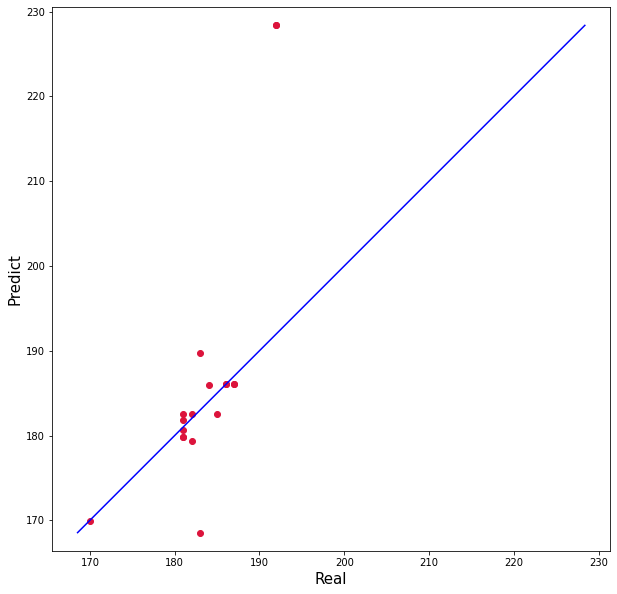

In [9]:
# visualization for trainset

plt.figure(figsize=(10,10))
plt.scatter(y_test, y_pred_testset, c='crimson')
plt.yscale('linear')
plt.xscale('linear')

p1 = max(max(y_pred_testset), max(y_train))
p2 = min(min(y_pred_testset), min(y_train))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Real', fontsize=15)
plt.ylabel('Predict', fontsize=15)
plt.axis('equal')
plt.show()

In [72]:
# prediction
inputset = ["set_nozzle_temperature", "set_front_temperature", "set_intermediate_temperature", "set_rear_temperature", "set_mold_velocity_1", "set_mold_velocity_2", "set_mold_velocity_3", "set_mold_velocity_4", "set_mold_velocity_5", "set_mold_pressure_1", "set_mold_pressure_2", "set_mold_pressure_3", "set_mold_pressure_4", "set_mold_pressure_5", "set_mold_position_1", "set_mold_position_2", "set_mold_position_3", "set_mold_position_4", "set_mold_position_5", "set_hold_velocity_1", "set_hold_velocity_2", "set_hold_velocity_3", "set_hold_pressure_1", "set_hold_pressure_2", "set_hold_pressure_3"]

input = [250, 230, 230,	220, # temperature
        40, 50,	50,	45,	40,	# mold velocity
        50,	60,	50,	50,	50,	# mold pressure
        85,	50,	40,	35,	25, #mold position
        20,	0,	0,	#hold velocity
        40,	0,	0] #hold pressure
result = model.predict([input])
print("Predicted weight : ", result)

Predicted weight :  [189.3518995]


/Users/byunghunhwang/dev/moldlink/venv/lib/python3.10/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
